In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Arial'

import warnings
warnings.filterwarnings("ignore")

In [4]:
# orders = ['Control', 'Chickpea']
# g_colors = ['lightcoral', 'lightseagreen']

In [5]:
file_path = './data/Key_metabolites.xlsx'

df = pd.read_excel(file_path, sheet_name='Sheet1')

In [6]:
df.head()

,Features (RT_mz),Identified compound,FC,Adjusted p-value,Class,Chemical formula,Adduct,Mode,Annotation level,HMDB ID,Putative source,Explanation
0,0.957_215.03285,Bergapten,113.20,0.006,Coumarins and derivatives,C12H8O4,[M-H]-1,Negative,MS2,HMDB0030637,Native phytochemical,Furanocoumarin present in some plants; not wel...
1,0.958_138.05499,Trigonelline,26.86,>0.001,Alkaloids and derivatives,C7H7NO2,[M+H]+1,Positive,MS2,HMDB0000875,Native phytochemical,Alkaloid naturally present in legumes includin...
2,11.128_283.06134,Glycitein,418.91,0.005,Isoflavonoids,C16H12O5,[M-H]-1,Negative,MS2,HMDB0005781,Native phytochemical,Isoflavone found in soy and chickpea
3,14.279_441.37311,Soyasapogenol C,13.39,0.001,Prenol lipids,C30H48O2,[M+H]+1,Positive,MS2,HMDB0034506,Native phytochemical,Triterpenoid saponin naturally found in chickpea
4,1.206_124.03927,Niacin (Vitamin B3),2.49,0.049,Pyridines and derivatives,C6H5NO2,[M+H]+1,Positive,MS2,HMDB0001488,Native phytochemical,Water-soluble vitamin present in various legumes


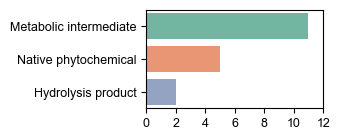

In [7]:
source_counts = df['Putative source'].value_counts()


plt.figure(figsize=(3.5, 1.5))
# plt.figure(figsize=(8, 5))
sns.barplot(y=source_counts.index, x=source_counts.values, palette='Set2')
# plt.title('Number of Metabolites by Putative Source')
# plt.xlabel('Count')
plt.ylabel('')
plt.xticks([0, 2, 4, 6, 8, 10, 12], fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()


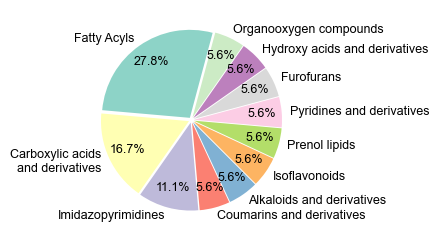

In [9]:
# 데이터 준비
class_counts = df['Class'].value_counts()
labels = class_counts.index
sizes = class_counts.values
explode = [0.03] * len(sizes)
colors = sns.color_palette("Set3", n_colors=len(labels))

# 파이차트 그리기 (autotext 제거 → 수동 배치할 예정)
plt.figure(figsize=(4, 2.5))
wedges, texts = plt.pie(
    sizes,
    labels=labels,
    startangle=75,
    explode=explode,
    colors=colors,
    wedgeprops={'linewidth': 0},
      textprops={'fontsize': 9}
)

# 퍼센트 수동 배치
total = sum(sizes)
for i, (wedge, size) in enumerate(zip(wedges, sizes)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.8
    y = np.sin(np.deg2rad(angle)) * 0.8
    percentage = f'{(size / total) * 100:.1f}%'
    plt.text(x, y, percentage, ha='center', va='center', fontsize=9)

# plt.title('Proportion of Metabolites by Class')
# plt.axis('equal')
plt.tight_layout()
plt.savefig('pie_rev.svg',dpi=600)
plt.show()
